In [1]:
import os
import glob
import pandas

In [2]:
# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

## Read in data: 

In [3]:
loanpayers = pd.read_csv("../datasets/combination_wellbeing_goingson_cons_outcome.csv")
print("Your data has",loanpayers.shape[0], "rows, and ", loanpayers.shape[1], "columns")
loanpayers.head()

Your data has 141 rows, and  55 columns


,loans,m_ids_owner,owner_score,owner_score_binarize,hh_ids,con_pur_hh_meanptrx,con_pur_hh_sdptrx,con_pur_hh_minpti,con_pur_hh_meanpti,con_pur_hh_medpti,...,police,doctor,unsafe,utilities,asset_taken,miss_app,miss_inc,romantic,hungry,school_sent
0,"['56134804374600000.3', '56134804374600000.1',...",65134441430300000,0.75,0,KELDK21,1061.1900,4257.9390,1150,26529.750,17300.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.100000
1,"['60137430710900000.1', '60134978362300000.1']",60134547419200000,0.50,0,KVIHK40,213.3567,406.9379,1810,14703.830,15589.5,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,"['63136740549700000.1', '63136740416600000.2',...",63134425702500000,1.00,0,KMAKE06,153.4010,1022.1200,120,5036.667,4232.5,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.000000
3,"['89136459180500000.2', '89136459180500000.1']",64134429266300000,1.00,0,KNBOK05,273.7134,1146.3220,3920,30884.000,29395.5,...,0.000000,0.0,0.181818,0.0,0.0,0.0,0.000000,0.0,0.0,0.142857
4,"['105136540140100000.1', '105136540140100000.2']",65134432186900000,1.00,0,KELDK37,217.1206,648.0765,10,9752.333,8557.5,...,0.071429,0.0,0.000000,0.0,0.0,0.0,0.083333,0.0,0.0,0.333333


In [4]:
labels = loanpayers.owner_score_binarize
del loanpayers["owner_score_binarize"]

loanpayers.shape

(141, 54)

## Data has duplicate columns (kind of... ) one for median and one for means that summarize people. So ... going to try just using means, see what happens; after will try using the medians: 

In [10]:
loanpayers.columns

Index(['loans', 'm_ids_owner', 'owner_score', 'hh_ids', 'con_pur_hh_meanptrx',
       'con_pur_hh_sdptrx', 'con_pur_hh_minpti', 'con_pur_hh_meanpti',
       'con_pur_hh_medpti', 'con_pur_hh_maxpti', 'con_pur_hh_meanpti_ALC',
       'con_pur_hh_medpti_ALC', 'con_pur_hh_meanpti_CLN',
       'con_pur_hh_medpti_CLN', 'con_pur_hh_meanpti_CLTH',
       'con_pur_hh_medpti_CLTH', 'con_pur_hh_meanpti_COMM',
       'con_pur_hh_medpti_COMM', 'con_pur_hh_meanpti_EDU',
       'con_pur_hh_medpti_EDU', 'con_pur_hh_meanpti_ENRGY',
       'con_pur_hh_medpti_ENRGY', 'con_pur_hh_meanpti_ENT',
       'con_pur_hh_medpti_ENT', 'con_pur_hh_meanpti_FOOD',
       'con_pur_hh_medpti_FOOD', 'con_pur_hh_meanpti_H20',
       'con_pur_hh_medpti_H20', 'con_pur_hh_meanpti_HSNG',
       'con_pur_hh_medpti_HSNG', 'con_pur_hh_meanpti_MED',
       'con_pur_hh_medpti_MED', 'con_pur_hh_meanpti_OTH',
       'con_pur_hh_medpti_OTH', 'con_pur_hh_meanpti_PERS',
       'con_pur_hh_medpti_PERS', 'con_pur_hh_meanpti_REL',
       

In [13]:
new_cols = [x for x in loanpayers.columns if 'med'  not in x]


In [14]:
loanpayers = loanpayers[new_cols]

In [15]:
loanpayers.shape

(141, 38)

## Train /test split: 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(loanpayers, labels, stratify = labels, random_state=42, test_size = 0.2 )

In [17]:
x_train.columns

Index(['loans', 'm_ids_owner', 'owner_score', 'hh_ids', 'con_pur_hh_meanptrx',
       'con_pur_hh_sdptrx', 'con_pur_hh_minpti', 'con_pur_hh_meanpti',
       'con_pur_hh_maxpti', 'con_pur_hh_meanpti_ALC', 'con_pur_hh_meanpti_CLN',
       'con_pur_hh_meanpti_CLTH', 'con_pur_hh_meanpti_COMM',
       'con_pur_hh_meanpti_EDU', 'con_pur_hh_meanpti_ENRGY',
       'con_pur_hh_meanpti_ENT', 'con_pur_hh_meanpti_FOOD',
       'con_pur_hh_meanpti_H20', 'con_pur_hh_meanpti_HSNG',
       'con_pur_hh_meanpti_MED', 'con_pur_hh_meanpti_OTH',
       'con_pur_hh_meanpti_PERS', 'con_pur_hh_meanpti_REL',
       'con_pur_hh_meanpti_TRNSP', 'happiness', 'economically',
       'relationships', 'confidence', 'police', 'doctor', 'unsafe',
       'utilities', 'asset_taken', 'miss_app', 'miss_inc', 'romantic',
       'hungry', 'school_sent'],
      dtype='object')

## Look at data: 

con_pur_hh_meanptrx           AxesSubplot(0.125,0.657941;0.227941x0.222059)
con_pur_hh_sdptrx          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
con_pur_hh_minpti          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
con_pur_hh_meanpti            AxesSubplot(0.125,0.391471;0.227941x0.222059)
con_pur_hh_maxpti          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
con_pur_hh_meanpti_ALC     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
con_pur_hh_meanpti_CLN           AxesSubplot(0.125,0.125;0.227941x0.222059)
con_pur_hh_meanpti_CLTH       AxesSubplot(0.398529,0.125;0.227941x0.222059)
con_pur_hh_meanpti_COMM       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

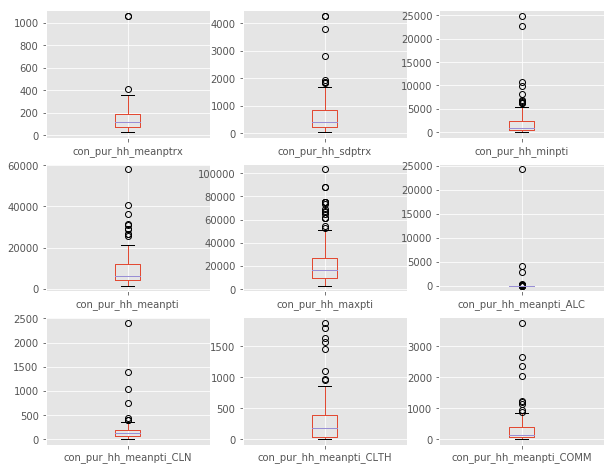

In [18]:
x_train[['con_pur_hh_meanptrx',
       'con_pur_hh_sdptrx', 'con_pur_hh_minpti', 'con_pur_hh_meanpti',
       'con_pur_hh_maxpti', 'con_pur_hh_meanpti_ALC', 'con_pur_hh_meanpti_CLN',
       'con_pur_hh_meanpti_CLTH', 'con_pur_hh_meanpti_COMM']].plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

con_pur_hh_meanpti_EDU         AxesSubplot(0.125,0.657941;0.227941x0.222059)
con_pur_hh_meanpti_ENRGY    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
con_pur_hh_meanpti_ENT      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
con_pur_hh_meanpti_FOOD        AxesSubplot(0.125,0.391471;0.227941x0.222059)
con_pur_hh_meanpti_H20      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
con_pur_hh_meanpti_HSNG     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
con_pur_hh_meanpti_MED            AxesSubplot(0.125,0.125;0.227941x0.222059)
con_pur_hh_meanpti_OTH         AxesSubplot(0.398529,0.125;0.227941x0.222059)
con_pur_hh_meanpti_PERS        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

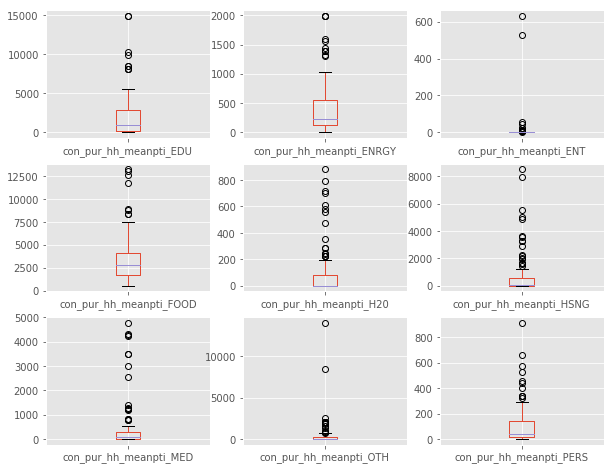

In [19]:
x_train[['con_pur_hh_meanpti_EDU', 'con_pur_hh_meanpti_ENRGY',
       'con_pur_hh_meanpti_ENT', 'con_pur_hh_meanpti_FOOD',
       'con_pur_hh_meanpti_H20', 'con_pur_hh_meanpti_HSNG',
       'con_pur_hh_meanpti_MED', 'con_pur_hh_meanpti_OTH',
       'con_pur_hh_meanpti_PERS']].plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

con_pur_hh_meanpti_REL         AxesSubplot(0.125,0.657941;0.227941x0.222059)
con_pur_hh_meanpti_TRNSP    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
happiness                   AxesSubplot(0.672059,0.657941;0.227941x0.222059)
economically                   AxesSubplot(0.125,0.391471;0.227941x0.222059)
relationships               AxesSubplot(0.398529,0.391471;0.227941x0.222059)
confidence                  AxesSubplot(0.672059,0.391471;0.227941x0.222059)
police                            AxesSubplot(0.125,0.125;0.227941x0.222059)
doctor                         AxesSubplot(0.398529,0.125;0.227941x0.222059)
unsafe                         AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

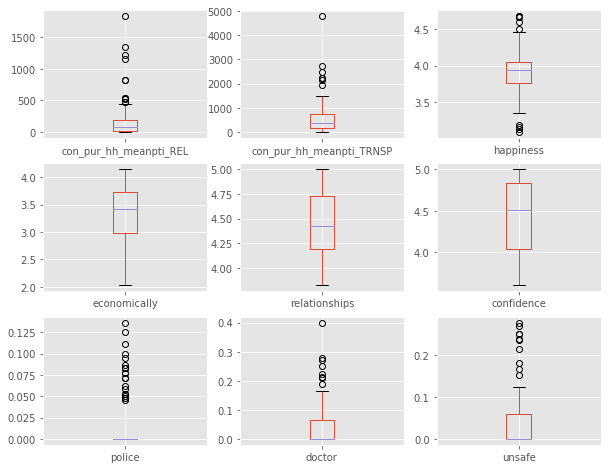

In [20]:

x_train[['con_pur_hh_meanpti_REL',
       'con_pur_hh_meanpti_TRNSP', 'happiness', 'economically',
       'relationships', 'confidence', 'police', 'doctor', 'unsafe']].plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

utilities         AxesSubplot(0.125,0.657941;0.227941x0.222059)
asset_taken    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
miss_app       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
miss_inc          AxesSubplot(0.125,0.391471;0.227941x0.222059)
romantic       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hungry         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
school_sent          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

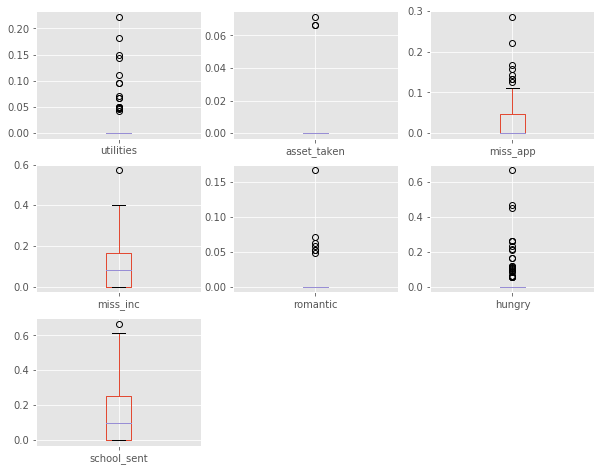

In [21]:

x_train[['utilities', 'asset_taken', 'miss_app', 'miss_inc', 'romantic',
       'hungry', 'school_sent']].plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [24]:
associations = pd.concat([x_train,y_train], axis=1)
associations.owner_score_binarize.value_counts(normalize=True)

0    0.848214
1    0.151786
Name: owner_score_binarize, dtype: float64

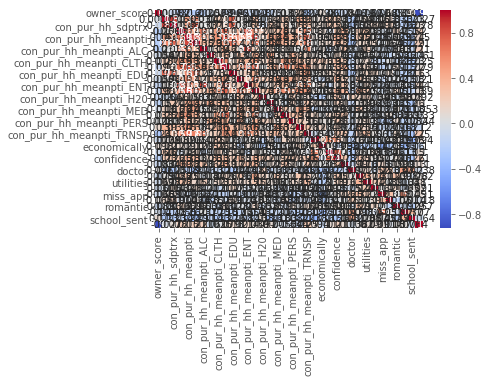

In [25]:
corr = associations[associations.columns].corr()
sns.heatmap(corr, annot = True, cmap='coolwarm')